In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [2]:
df = pd.read_csv("documentation\C6_SCJ_Mur_Sud_1.csv",header=1)

In [3]:
df = pd.read_excel("documentation/21027238 Nord 2023-09-27 10_57_14 CET (Data CET)(1).xlsx")
# df = pd.read_excel("documentation/21027241 Est 2023-09-27 10_58_05 CET (Data CET).xlsx")
# df = pd.read_excel("documentation/21027239 Sud Est 2023-09-27 10_57_37 CET (Data CET).xlsx")


In [ ]:
df["Date-Time (CET)"] = pd.to_datetime(df["Date-Time (CET)"])

mask = (df["Date-Time (CET)"] >= "2022-09-25") & (df["Date-Time (CET)"] <= "2023-09-25")
df = df[mask]

df["date_only"] = df["Date-Time (CET)"].dt.floor("D")
grouped = df.groupby("date_only")["Ch: 3 - RH   (%)"]
amplitude = grouped.max() - grouped.min()
# amplitude = (grouped.max() - grouped.min()).dropna()

Distribution des amplitudes hydriques quotidiennes:
0-1 % : 1 mesure
1-2 % : 8 mesures
2-3 % : 17 mesures
3-4 % : 28 mesures
4-5 % : 24 mesures
5-6 % : 38 mesures
6-7 % : 40 mesures
7-8 % : 28 mesures
8-9 % : 44 mesures
9-10 % : 32 mesures
10-11 % : 22 mesures
11-12 % : 17 mesures
12-13 % : 20 mesures
13-14 % : 11 mesures
14-15 % : 13 mesures
15-16 % : 7 mesures
16-17 % : 7 mesures
17-18 % : 2 mesures
18-19 % : 2 mesures
19-20 % : 1 mesure
20-21 % : 1 mesure
21-22 % : 1 mesure
22-23 % : 1 mesure
23-24 % : 1 mesure
24-25 % : 0 mesures


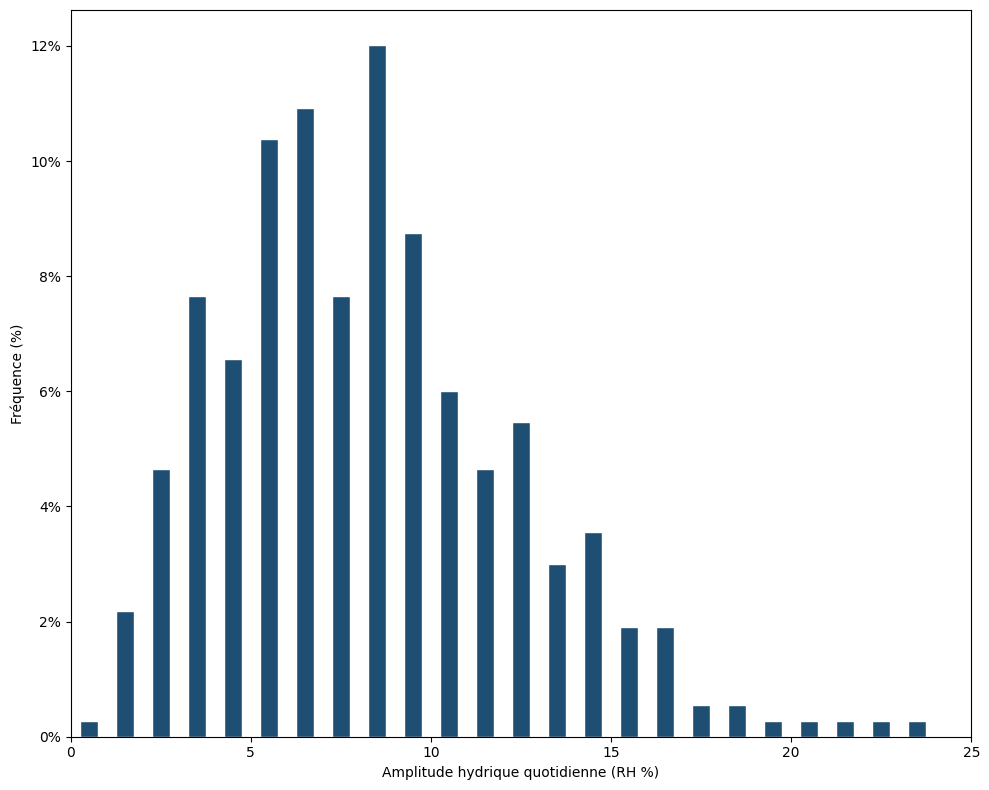

In [ ]:
# Créer l'histogramme pour obtenir les comptages
fig, ax2 = plt.subplots(figsize=(10, 8))
counts, bins, _ = ax2.hist(
    amplitude,
    bins=25,
    range=(0, 25),  # Définir la plage de 0 à 25
    color="#1e4f73",
    edgecolor='white',
    weights=np.ones_like(amplitude) / len(amplitude),
    rwidth=.5
)

# Convertir les fréquences relatives en nombre de mesures
total_samples = len(amplitude)
counts_absolute = counts * total_samples

# Afficher l'histogramme
ax2.set_xlabel("Amplitude hydrique quotidienne (RH %)")
ax2.set_ylabel("Fréquence (%)")
ax2.set_xlim(0, 25)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y * 100)}%'))

# Générer et afficher le texte avec les intervalles et le nombre de mesures
print("Distribution des amplitudes hydriques quotidiennes:")
for i in range(len(bins)-1):
    start = bins[i]
    end = bins[i+1]
    count = int(round(counts_absolute[i]))
    mesure_text = "mesure" if count == 1 else "mesures"
    print(f"{start:.0f}-{end:.0f} % : {count} {mesure_text}")

plt.tight_layout()
plt.show()

In [17]:
amplitude

date_only
2022-09-25     5.685425
2022-09-26    14.291382
2022-09-27     8.328247
2022-09-28     4.898071
2022-09-29     6.719971
                ...    
2023-09-21     5.035400
2023-09-22    11.523438
2023-09-23    10.310364
2023-09-24    11.575317
2023-09-25     0.000000
Name: Ch: 3 - RH   (%), Length: 366, dtype: float64

In [16]:
amplitude.min()

np.float64(0.0)

In [18]:
amplitude.max()

np.float64(23.454284667968807)

In [11]:
counts_absolute[0]

np.float64(1.0)

In [12]:
counts_absolute[1]

np.float64(8.0)